In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import torch
import torch.optim as optim
import torch.nn as nn


In [ ]:
true_b = 1
true_w = 2
N = 100
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.rand(N, 1))
y = true_b + true_w * x + epsilon

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val,y_train,y_val = train_test_split(x,y,random_state=0,test_size=0.2)

Text(0.5, 1.0, 'traning')

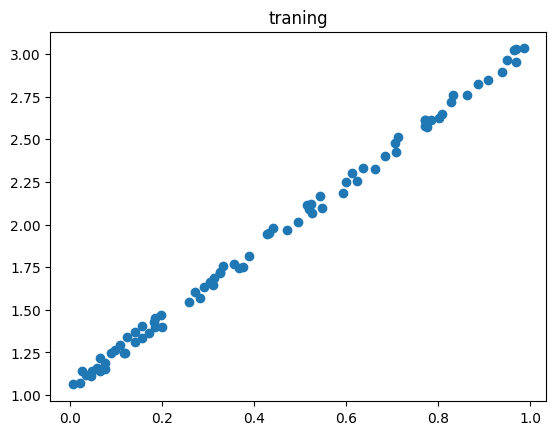

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.title('traning')

DEEP LEARNING SEPS

1. Random Initialization
2. Computer Model's Predction
3. Computer Loss
4. Computer Gredients

Step-01

In [ ]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
print(b,w)

[0.49671415] [-0.1382643]


Step-02

In [ ]:
yhat = b + w * x_train

Step-03

In [ ]:
error = (yhat - y_train)
loss = (error ** 2).mean()
print(loss)

2.621202688077918


Step-04

In [ ]:
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-2.9715698360186638 -1.6837245341152354


Step 5 - Update the Parameters

In [ ]:
lr = 0.1
print(b, w)
# Step 4 - Updates parameters using gradients and
# the learning rate
b = b - lr * b_grad
w = w - lr * w_grad
print(b, w)

[0.49671415] [-0.1382643]
[0.79387114] [0.03010815]


Step 6 - Check and Repeat!

In [ ]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
print(b, w)
lr = 0.1
n_epochs = 1000
for epoch in range(n_epochs):
    yhat = b + w * x_train
    error = (yhat - y_train)
    loss = (error ** 2).mean()
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()
    b = b - lr * b_grad
    w = w - lr * w_grad
print(b, w)

[0.49671415] [-0.1382643]
[1.04872748] [2.00004872]


In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
LinearRegression()

LinearRegression()

In [ ]:
print(lr.intercept_,lr.coef_)

[1.04872728] [[2.00004915]]


In [ ]:
y_pred = [ b+w*x for x in x_val ]

In [ ]:
print(y_pred)

[array([1.44808477]), array([2.50797538]), array([2.51275103]), array([2.89252087]), array([2.50677734]), array([2.17130922]), array([1.65722679]), array([2.67969007]), array([2.24455657]), array([2.03634273]), array([2.83842578]), array([2.57033464]), array([1.7656764]), array([1.47341605]), array([2.78112197]), array([2.26384678]), array([1.63303101]), array([1.96088967]), array([2.94654479]), array([2.25098679])]


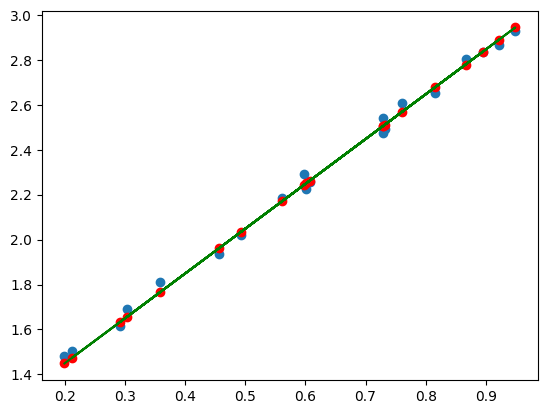

In [ ]:
plt.scatter(x_val,y_val)
plt.scatter(x_val,y_pred,c="red")
plt.plot(x_val,y_pred,c='green')

Now it is torch time

In [ ]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)
print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[ 1.2855,  1.0272, -1.9581, -0.1736],
         [-0.2089, -0.0369,  1.8516, -0.1973],
         [-0.1105, -0.2402, -0.4104,  1.7242]],

        [[ 0.3701,  1.8062, -1.1290, -0.5093],
         [-0.8398, -1.1227,  0.2343,  0.2065],
         [-0.4834, -0.8159,  0.1316, -0.6409]]])


In [ ]:
tensor.shape

torch.Size([2, 3, 4])

In [ ]:
scalar.shape

torch.Size([])

In [ ]:
tensor.view(1,24)

tensor([[ 1.2855,  1.0272, -1.9581, -0.1736, -0.2089, -0.0369,  1.8516, -0.1973,
         -0.1105, -0.2402, -0.4104,  1.7242,  0.3701,  1.8062, -1.1290, -0.5093,
         -0.8398, -1.1227,  0.2343,  0.2065, -0.4834, -0.8159,  0.1316, -0.6409]])

In [ ]:
#to duplicate a tensor
another_matrix = matrix.view(1, 6).clone().detach()

In [ ]:
another_matrix

tensor([[1., 1., 1., 1., 1., 1.]])

In [ ]:
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype,x_train_tensor.dtype

(dtype('float64'), torch.float64)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cuda'

In [ ]:
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[0]

tensor([0.9093], device='cuda:0', dtype=torch.float64)

Step 1

In [ ]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [ ]:
#send to device while creating the tensor
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True,dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
dtype=torch.float, device=device)
print(b, w)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


In [ ]:
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)

In [ ]:
# Step 2 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor
# Step 3 - Computes the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train_tensor)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
# Step 4 - Computes gradients for both "b" and "w" parameters
# No more manual computation of gradients!
# b_grad = 2 * error.mean()
# w_grad = 2 * (x_tensor * error).mean()
loss.backward()

In [ ]:
print(error.requires_grad, yhat.requires_grad, \
b.requires_grad, w.requires_grad)
print(y_train_tensor.requires_grad, x_train_tensor.requires_grad)

True True True True
False False


In [ ]:
print(b.grad, w.grad)

tensor([-3.3347], device='cuda:0') tensor([-1.7922], device='cuda:0')


In [ ]:
b.grad.zero_(), w.grad.zero_()

(tensor([0.], device='cuda:0'), tensor([0.], device='cuda:0'))

In [ ]:
lr = 0.1
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True,dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True,dtype=torch.float, device=device)
n_epochs = 1000


for epoch in range(n_epochs):
    yhat = b + w * x_train_tensor
    error = (yhat - y_train_tensor)
    loss = (error ** 2).mean()
    loss.backward()
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad
        b.grad.zero_()
        w.grad.zero_()
print(b, w)

tensor([1.0487], device='cuda:0', requires_grad=True) tensor([2.0000], device='cuda:0', requires_grad=True)


Easy way

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

lr = 0.1
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(1, 1)).to(device)
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.MSELoss(reduction='mean')
n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    yhat = model(x_train_tensor)
    loss = loss_fn(yhat, y_train_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

In [ ]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[2.0000]], device='cuda:0')), ('0.bias', tensor([1.0487], device='cuda:0'))])


In [ ]:
w = model.state_dict()['0.weight'].to('cpu')
b = model.state_dict()['0.bias'].to('cpu')

In [ ]:
y_pred = [ (b+w*x).item() for x in x_val ]

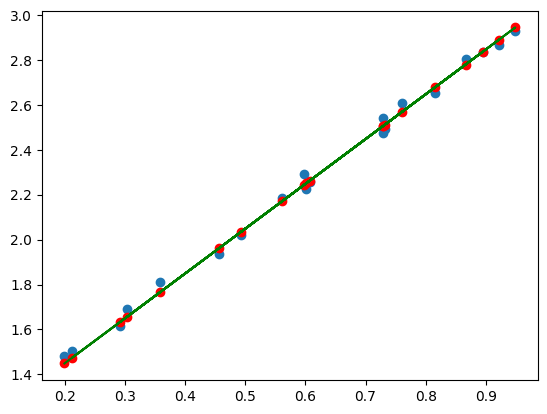

In [ ]:
plt.scatter(x_val,y_val)
plt.scatter(x_val,y_pred,c="red")
plt.plot(x_val,y_pred,c='green')